In [1]:
#Import Essential Libraries
import streamlit as st 
import pandas as pd
import numpy as np

# Plot Package
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import parameters packages
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonTypeAllStar
from nba_api.stats.library.parameters import SeasonType

# Import Stats Endpoints
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.endpoints import playergamelogs

# Import Team list
from nba_api.stats.static import teams

# nba_function
from nba_functions import *
from retrieve_data import *

In [2]:
gamelog_2020_21_fn= '2020-2021_gamelog.csv'
gamelog_2020_21_raw = pd.read_csv(gamelog_2020_21_fn)
seasongamelog = SeasonGameLog()

In [3]:
gamelog_2020_21 = seasongamelog.vs_gamelog(gamelog_2020_21_raw)

In [4]:
winners = gamelog_2020_21[gamelog_2020_21['WL']=='W']

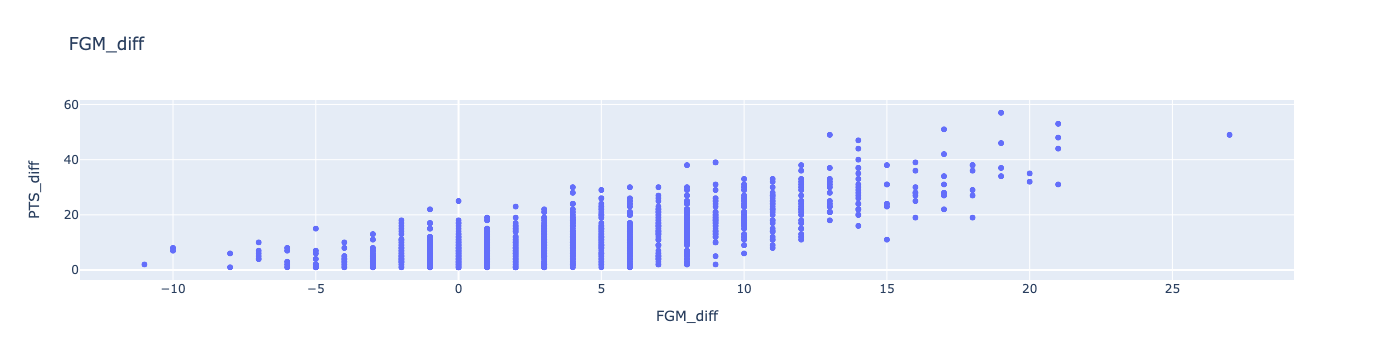

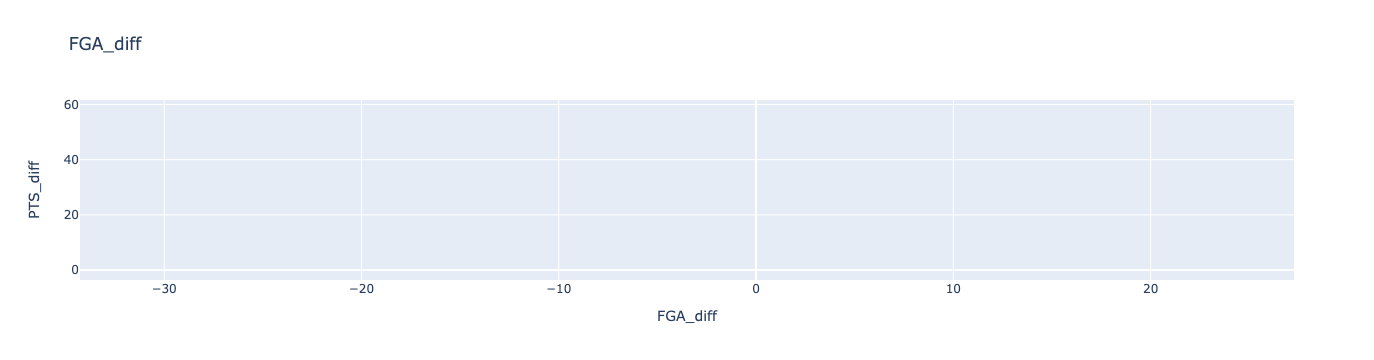

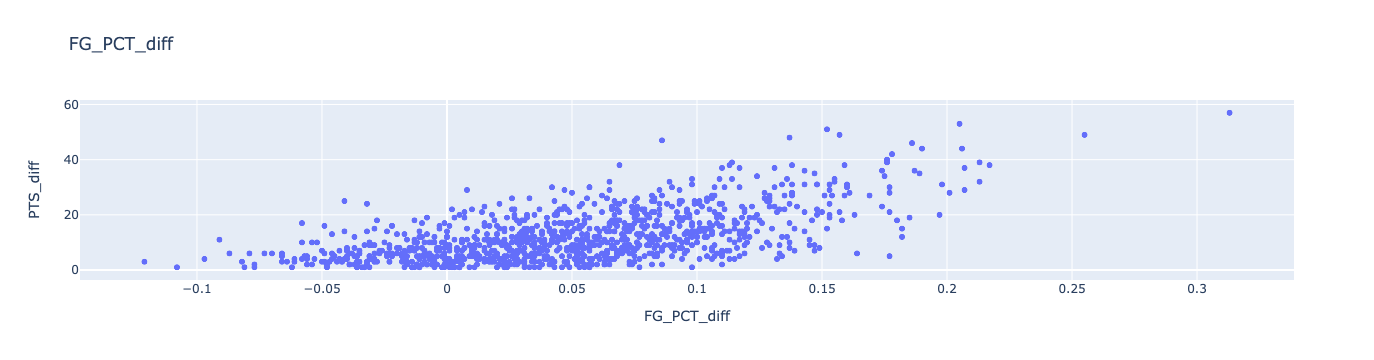

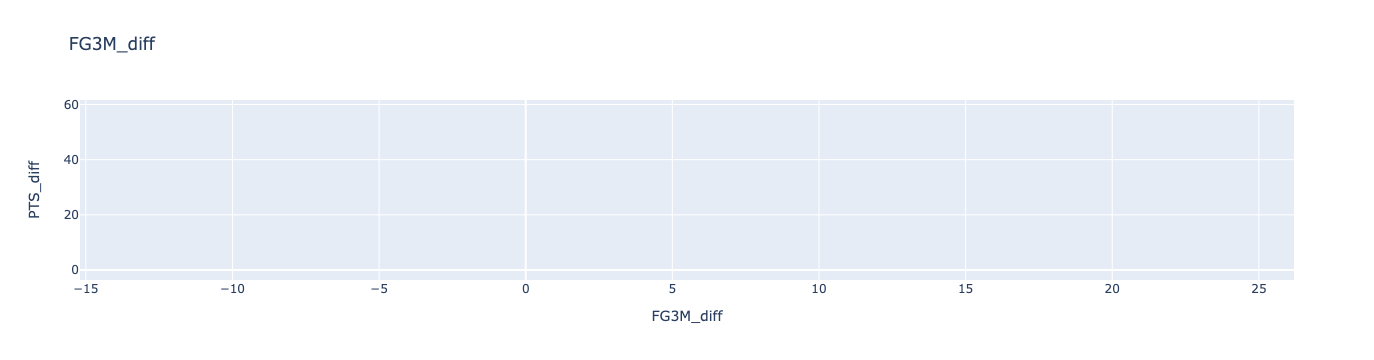

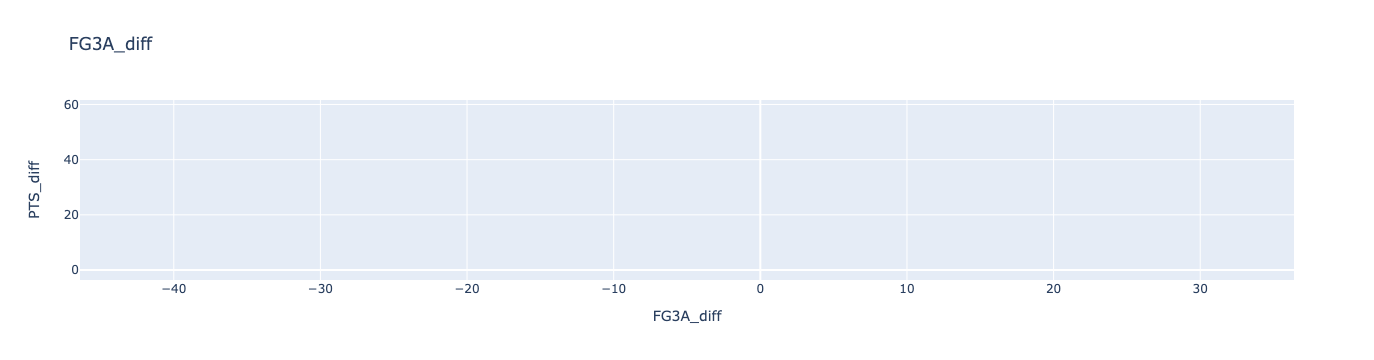

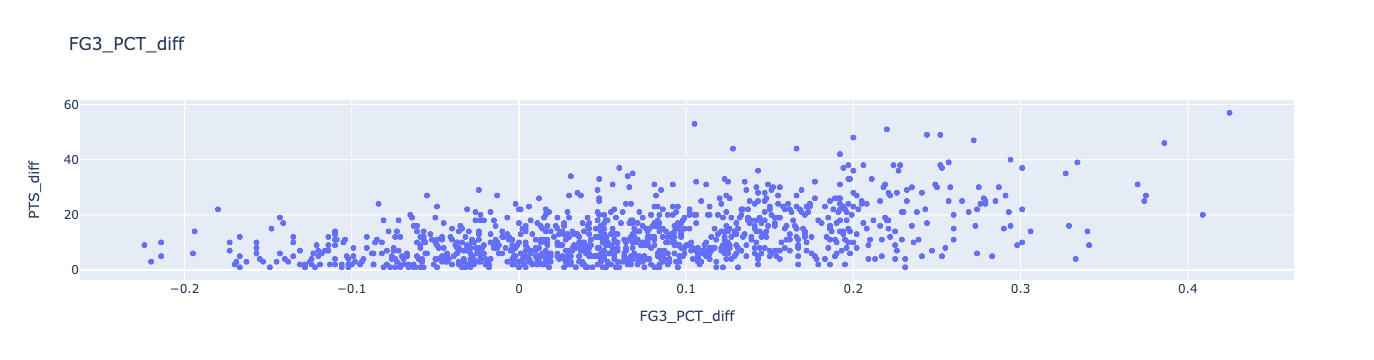

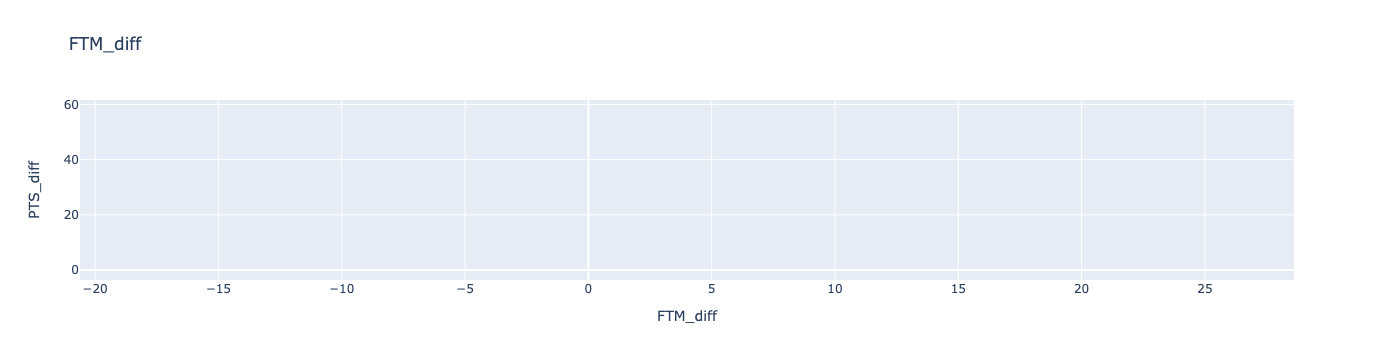

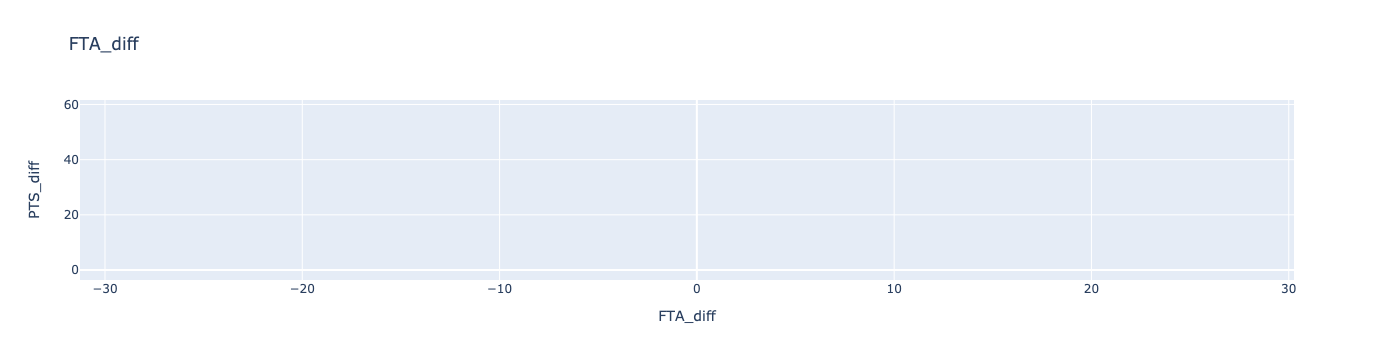

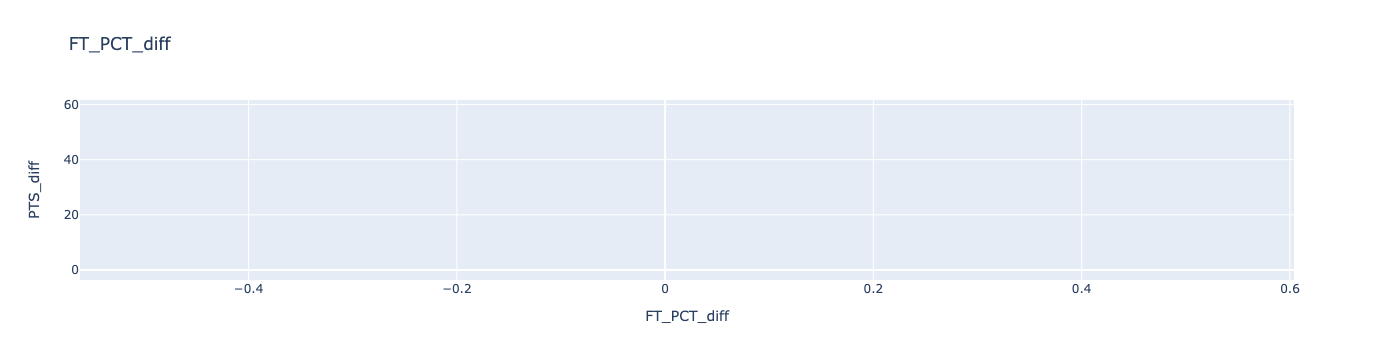

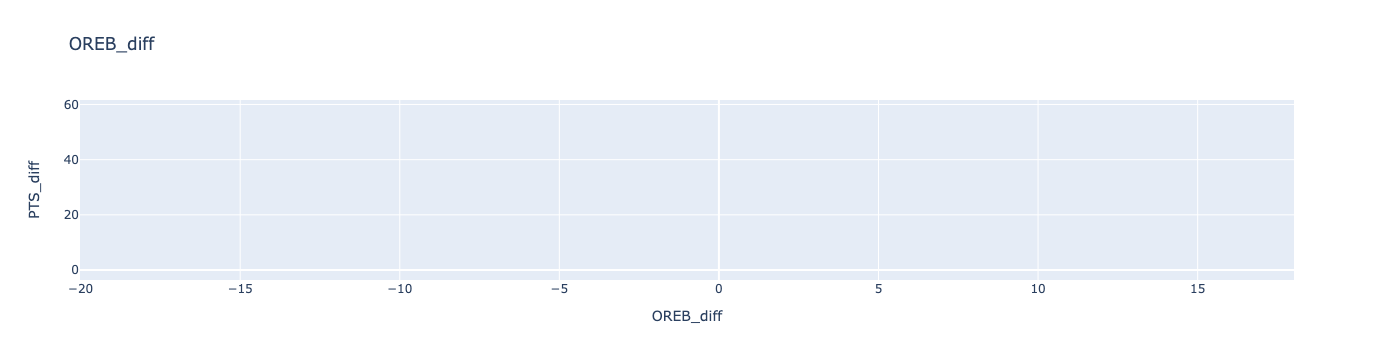

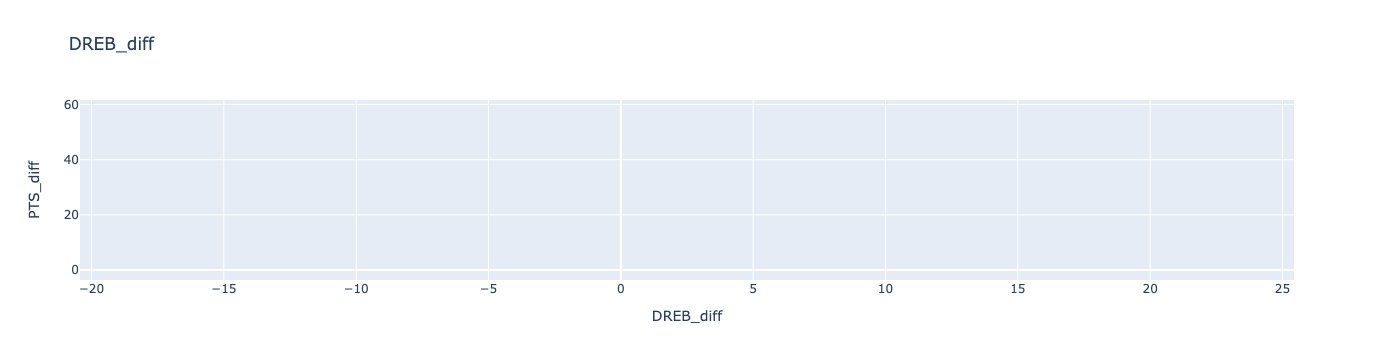

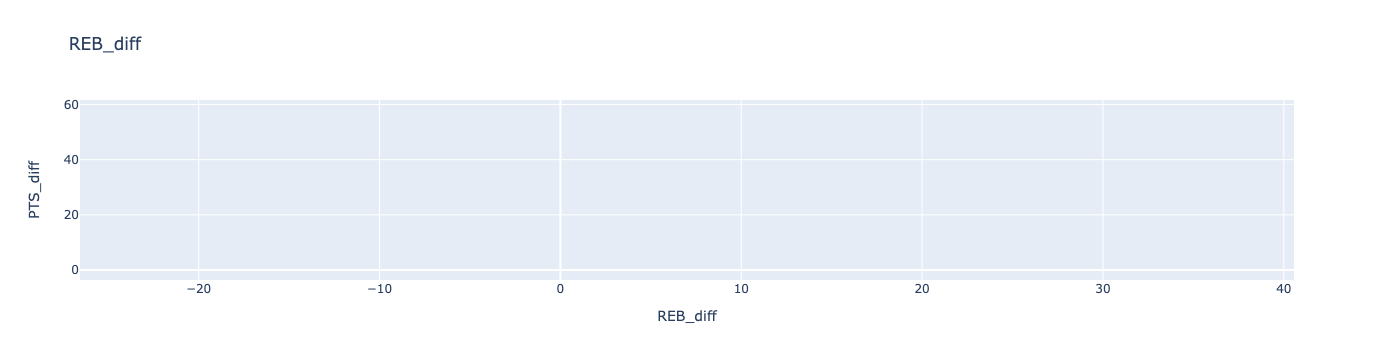

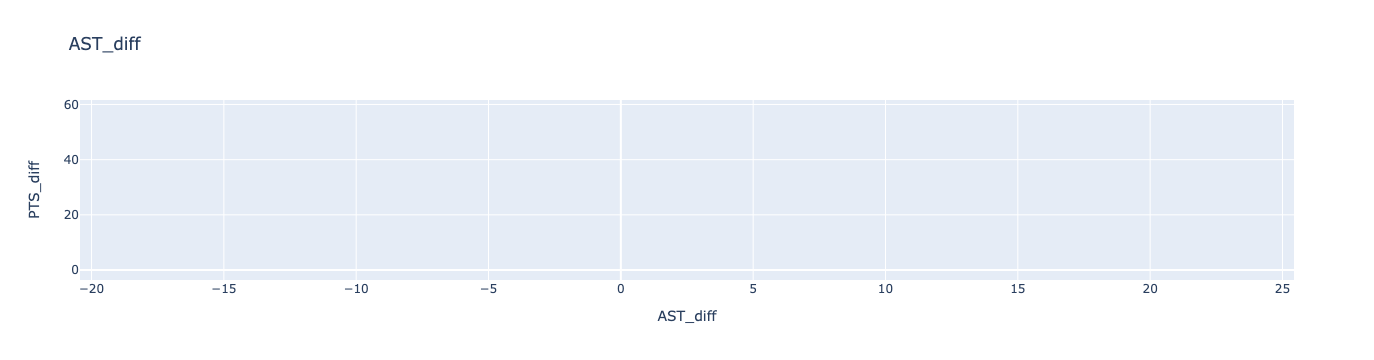

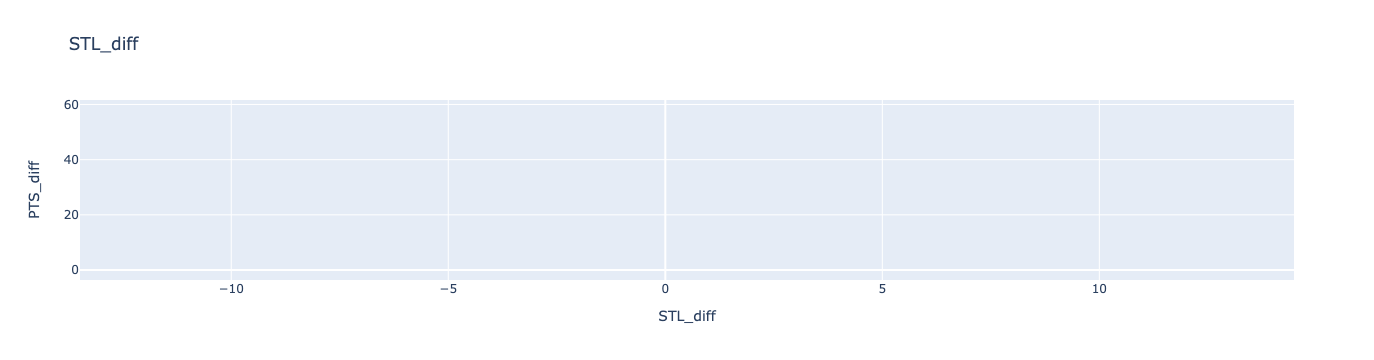

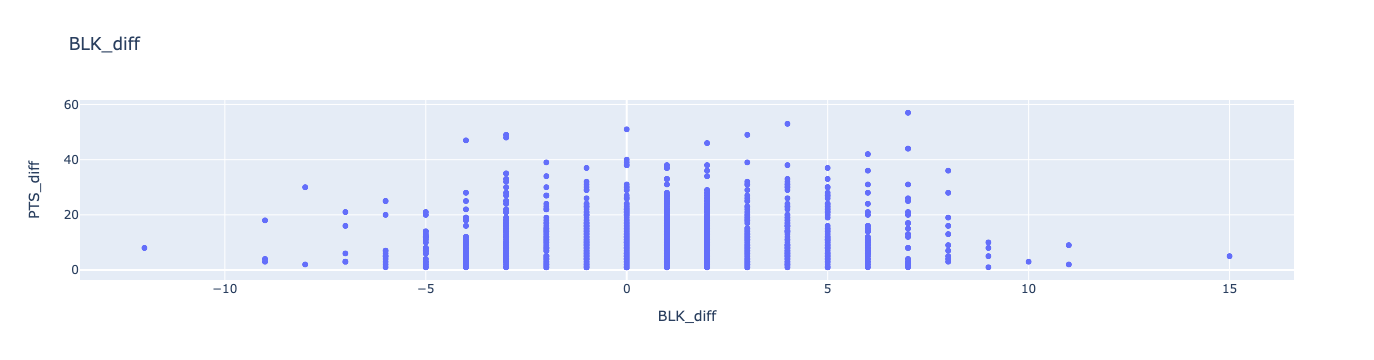

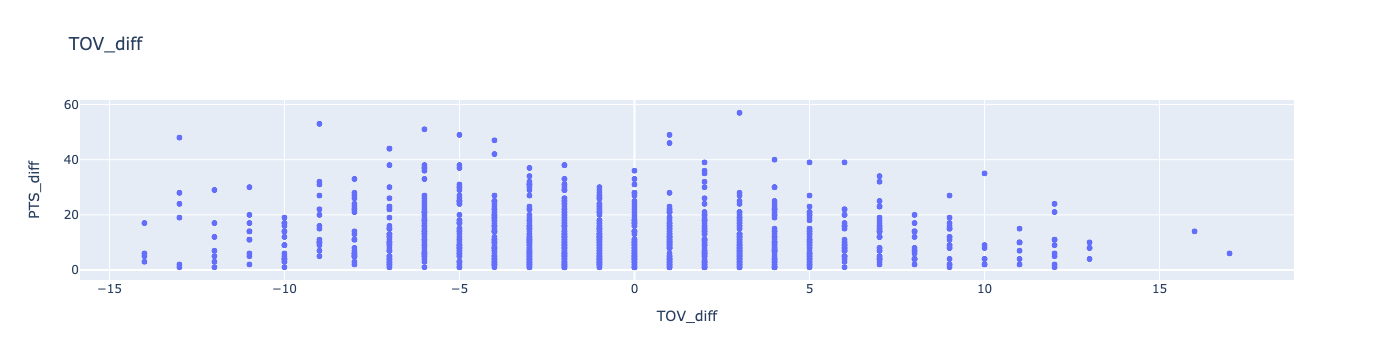

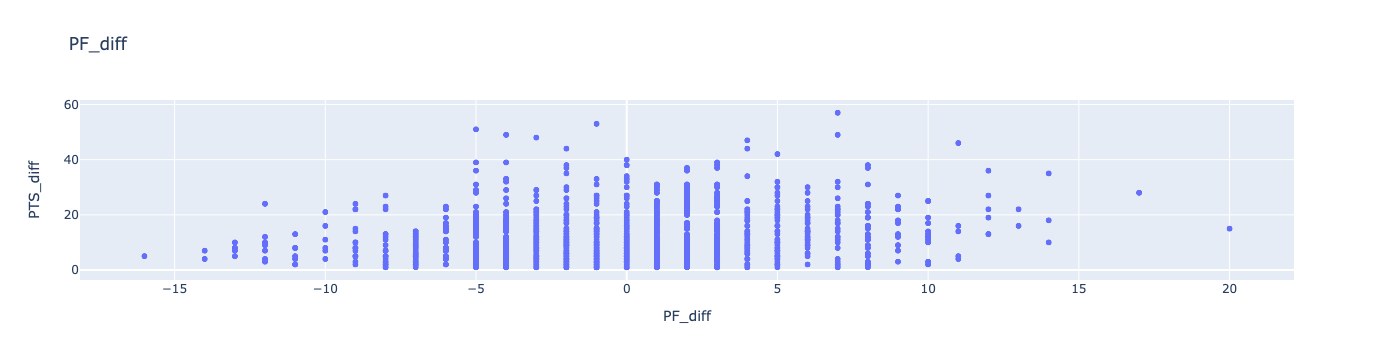

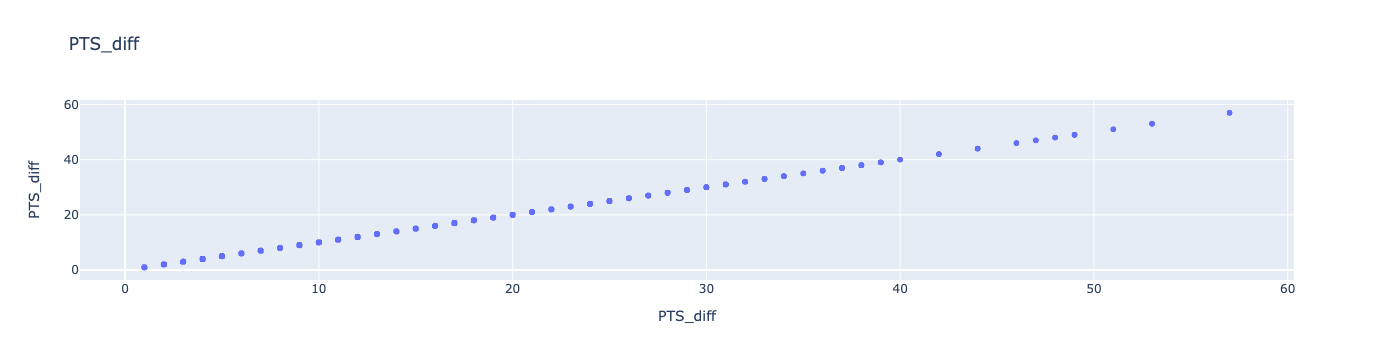

In [21]:
cols = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

diff_cols = [col+'_diff' for col in cols]


/Users/joseph.cheng@coinbase.com/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='OREB_diff', ylabel='PTS_diff'>

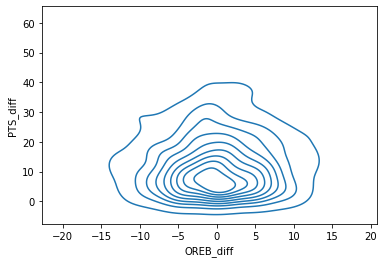

In [12]:
sns.kdeplot(winners['OREB_diff'], winners['PTS_diff'])